In [12]:
import pickle
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

In [13]:
sp_labels = {0: "Diamond, 3000K",
             1: "Graphite, 3000K",
             2: "0.5 gcc, 1000K",
             3: "1.0 gcc, 2000K",
             4: "2.0 gcc, 6000K",
             5: "3.6 gcc, 6000K",
             6: "3.0 gcc, 8000K",
             7: "Diamond, 300K",
             8: "Graphite, 300K",
             9: "Graphite, 1500K",
             10: "2.0 gcc, 7000K",
             11: "2.5 gcc, 6000K"}

# Function to replace labels in the linkage matrix
def replace_labels(label, label_dict):
    return label_dict[int(label)]


2B Analysis

(12, 60, 1)
         0         1         2         3         4         5         6   \
0  0.137188  0.092633  0.049476  0.076421  0.044719  0.032463  0.021425   
1  0.106090  0.078746  0.067228  0.065747  0.058596  0.050477  0.047420   
2  0.092599  0.067998  0.051613  0.041544  0.036382  0.036495  0.037917   
3  0.092961  0.075302  0.062582  0.053748  0.048379  0.045364  0.043087   
4  0.083824  0.076027  0.068725  0.062045  0.055158  0.049057  0.043915   

         7         8         9   ...        50        51        52        53  \
0  0.039249  0.028780  0.027031  ...  0.000115  0.000191  0.000445  0.001060   
1  0.045200  0.038940  0.029677  ...  0.001011  0.001088  0.001181  0.001277   
2  0.035783  0.024029  0.015507  ...  0.005933  0.005408  0.004767  0.004041   
3  0.038947  0.033654  0.027521  ...  0.001810  0.001892  0.002014  0.002152   
4  0.039156  0.035118  0.031416  ...  0.002660  0.002732  0.002792  0.002866   

         54        55        56        57        58     

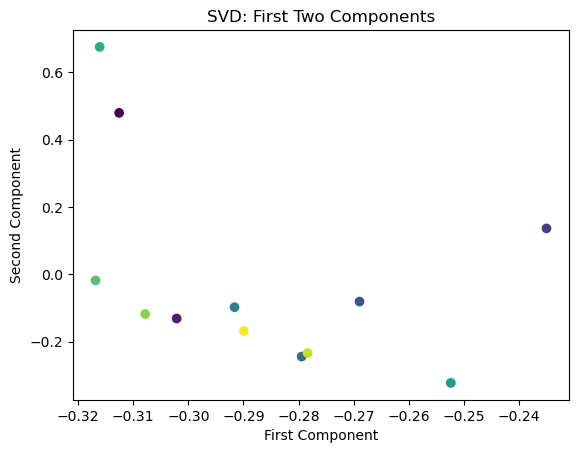

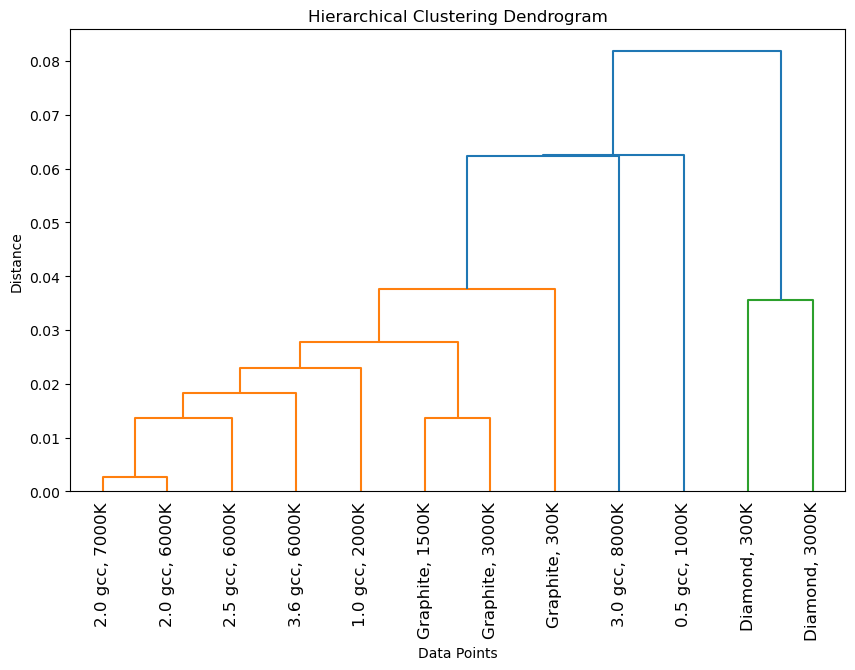

(12, 13, 60)
(156, 60)


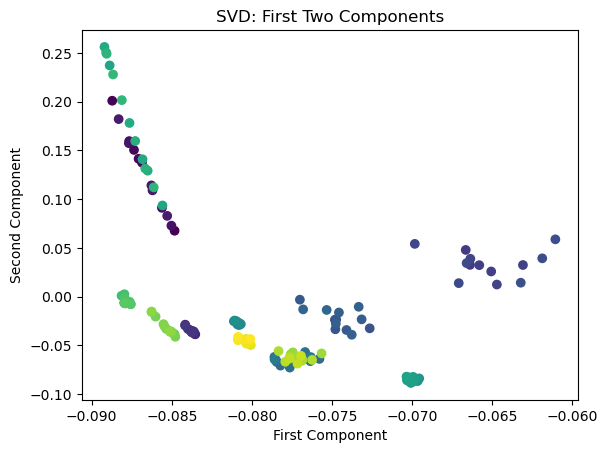

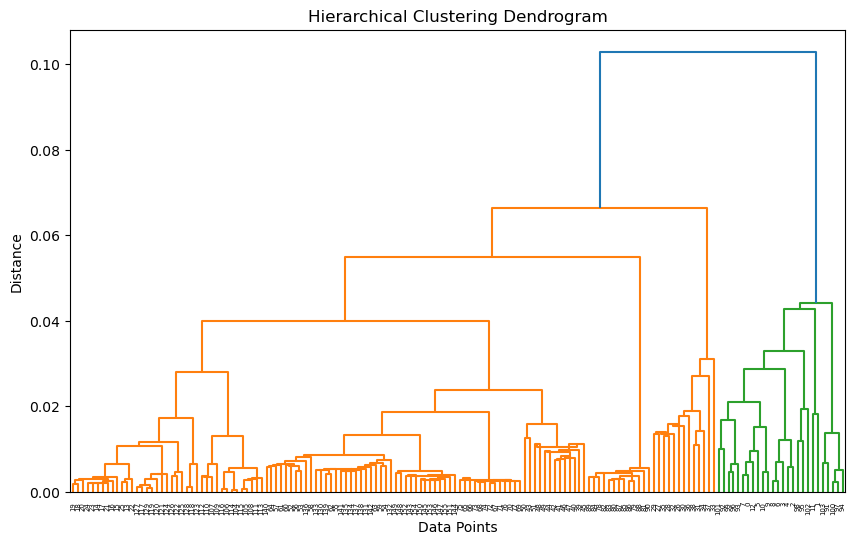

In [14]:
with open("2b_avg_pd_equilibrium", 'rb') as pickle_file:
    avg_pd = pickle.load(pickle_file)

# Confirmation of appropriate loading
print(np.shape(avg_pd))

# Reshape the array to (12, 60) before creating the DataFrame
reshaped_data = np.array(avg_pd).reshape(12, 60)

# Create a DataFrame
df = pd.DataFrame(reshaped_data)

# Print the DataFrame
print(df.head())

# SVD Decomposition
U, S, Vt = np.linalg.svd(df, full_matrices=False)

# Create a list of colors (replace this with your color preferences)
colors = np.arange(len(U[:, 0]))

# Plot the first two components from the U matrix
plt.scatter(U[:, 0], U[:, 1], c=colors, cmap='viridis')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('SVD: 2B P(d) Avgs.')
plt.show()

# Hierarchical clustering
linkage_matrix = linkage(df, method='median')  # You can choose a different linkage method

# Plot the dendrogram with labeled points
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=df.index, orientation='top', distance_sort='descending', leaf_label_func=lambda x: replace_labels(x, sp_labels))
plt.title('Dendrogram: 2B P(d) Avgs.')
plt.xticks(rotation='vertical')
plt.ylabel('Distance')
plt.show()

with open("2b_all_pd_equilibrium", 'rb') as pickle_file:
    all_pd = pickle.load(pickle_file)

print(np.shape(all_pd))

stacked_data = np.vstack(all_pd)
print(np.shape(stacked_data))

# Create a DataFrame
all_df = pd.DataFrame(stacked_data)

# SVD Decomposition
U, S, Vt = np.linalg.svd(all_df, full_matrices=False)

# Create a list of colors (replace this with your color preferences)
colors = np.arange(len(U[:, 0]))

# Plot the first two components from the U matrix
plt.scatter(U[:, 0], U[:, 1], c=colors, cmap='viridis')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('SVD: 2B P(d)')
plt.show()

# Hierarchical clustering
linkage_matrix = linkage(all_df, method='median')  # You can choose a different linkage method

# Plot the dendrogram with labeled points
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=all_df.index, orientation='top', distance_sort='descending')
plt.title('Dendrogram: 2B P(d)')
plt.xticks(rotation='vertical')
plt.ylabel('Distance')
plt.show()

3B Analysis

(12, 60, 1)
         0         1         2         3         4         5         6   \
0  0.026079  0.025921  0.047063  0.025353  0.031944  0.051901  0.046078   
1  0.005783  0.021025  0.035666  0.044783  0.050437  0.052678  0.051657   
2  0.007864  0.024846  0.033409  0.035903  0.031965  0.025288  0.019094   
3  0.005685  0.020559  0.031019  0.035968  0.036767  0.034745  0.031928   
4  0.006422  0.026749  0.042362  0.050102  0.052881  0.052923  0.051452   

         7         8         9   ...        50        51        52        53  \
0  0.051090  0.032311  0.039108  ...  0.000571  0.000755  0.000787  0.000797   
1  0.049406  0.046778  0.043766  ...  0.000672  0.000654  0.000639  0.000621   
2  0.015484  0.014328  0.015825  ...  0.003933  0.003875  0.004057  0.004095   
3  0.029755  0.028762  0.028699  ...  0.002004  0.001894  0.001868  0.001842   
4  0.049246  0.046625  0.043784  ...  0.000741  0.000646  0.000567  0.000499   

         54        55        56        57        58     

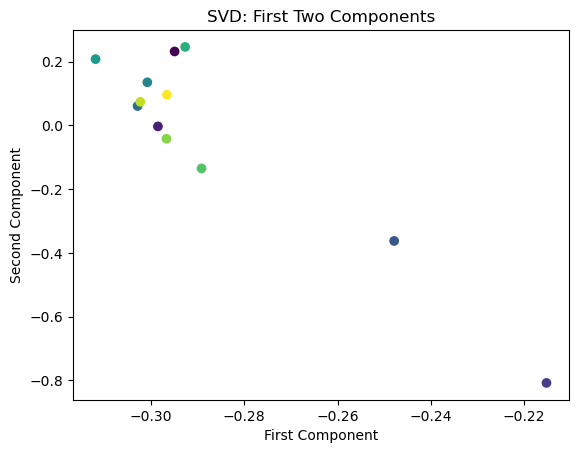

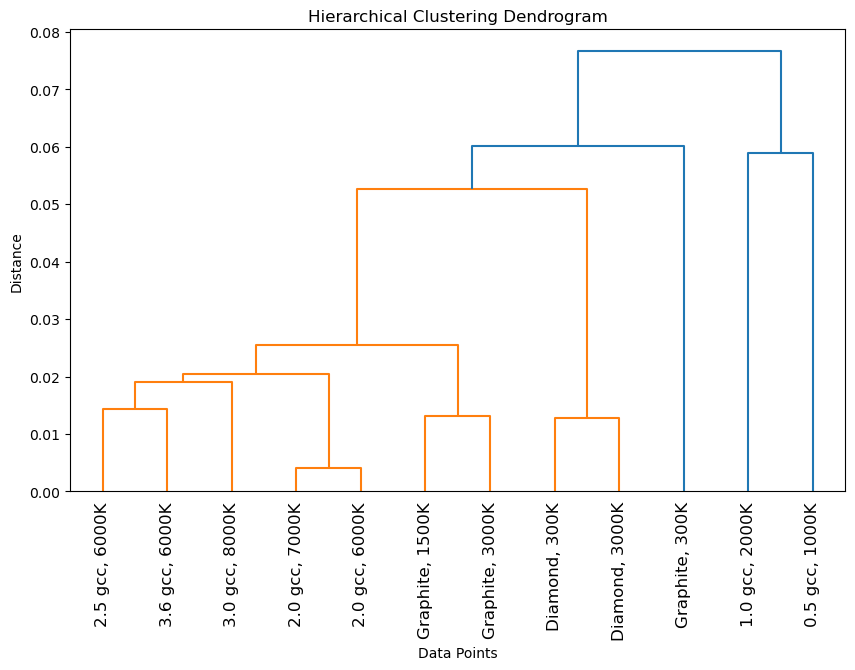

(12, 13, 60)
(156, 60)


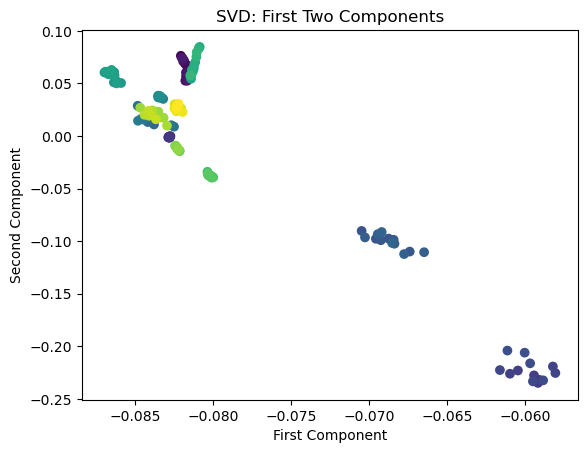

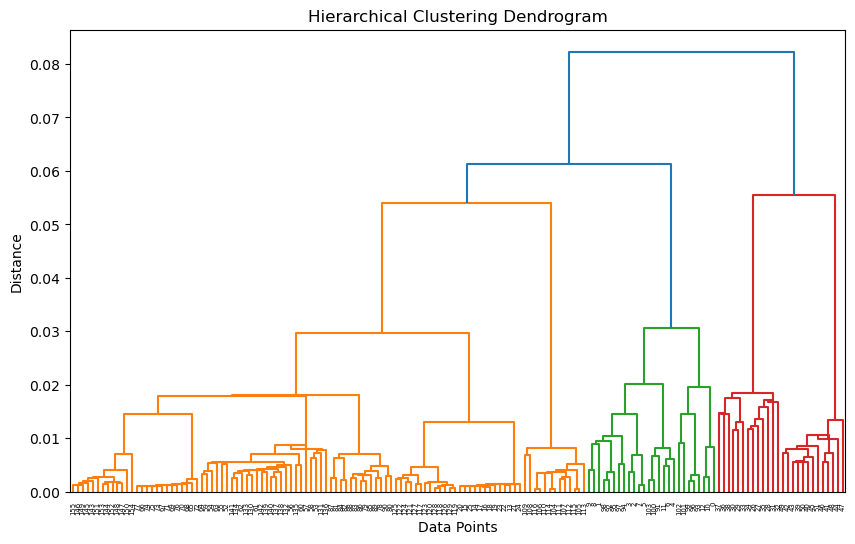

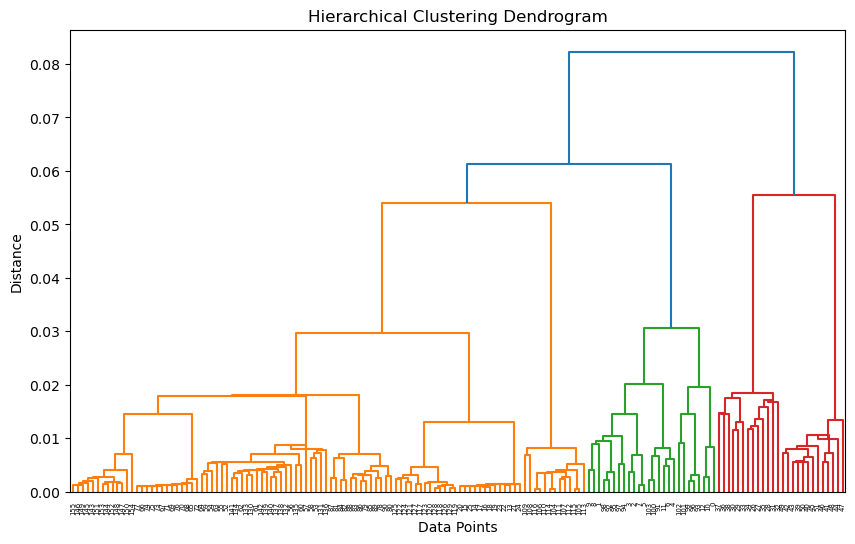

In [15]:
with open("3b_avg_pd_equilibrium", 'rb') as pickle_file:
    avg_pd = pickle.load(pickle_file)

# Confirmation of appropriate loading
print(np.shape(avg_pd))

# Reshape the array to (12, 60) before creating the DataFrame
reshaped_data = np.array(avg_pd).reshape(12, 60)

# Create a DataFrame
df = pd.DataFrame(reshaped_data)

# Print the DataFrame
print(df.head())

# SVD Decomposition
U, S, Vt = np.linalg.svd(df, full_matrices=False)

# Create a list of colors (replace this with your color preferences)
colors = np.arange(len(U[:, 0]))

# Plot the first two components from the U matrix
plt.scatter(U[:, 0], U[:, 1], c=colors, cmap='viridis')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('SVD: 3B P(d) Avgs.')
plt.show()

# Hierarchical clustering
linkage_matrix = linkage(df, method='median')  # You can choose a different linkage method

# Plot the dendrogram with labeled points
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=df.index, orientation='top', distance_sort='descending', leaf_label_func=lambda x: replace_labels(x, sp_labels))
plt.title('Dendrogram: 3B P(d) Avgs.')
plt.xticks(rotation='vertical')
plt.ylabel('Distance')
plt.show()

with open("3b_all_pd_equilibrium", 'rb') as pickle_file:
    all_pd = pickle.load(pickle_file)

print(np.shape(all_pd))

stacked_data = np.vstack(all_pd)
print(np.shape(stacked_data))

# Create a DataFrame
all_df = pd.DataFrame(stacked_data)

# SVD Decomposition
U, S, Vt = np.linalg.svd(all_df, full_matrices=False)

# Create a list of colors (replace this with your color preferences)
colors = np.arange(len(U[:, 0]))

# Plot the first two components from the U matrix
plt.scatter(U[:, 0], U[:, 1], c=colors, cmap='viridis')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('SVD: 3B P(d)')
plt.show()

# Hierarchical clustering
linkage_matrix = linkage(all_df, method='median')  # You can choose a different linkage method

# Plot the dendrogram with labeled points
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=all_df.index, orientation='top', distance_sort='descending')
plt.title('Dendrogram: 3B P(d)')
plt.xticks(rotation='vertical')
plt.ylabel('Distance')
plt.show()

# Hierarchical clustering
linkage_matrix = linkage(all_df, method='median')  # You can choose a different linkage method

# Plot the dendrogram with labeled points
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=all_df.index, orientation='top', distance_sort='descending')
plt.title('Dendrogram')
plt.xticks(rotation='vertical')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

4B Analysis

(12, 60, 1)
         0         1         2         3         4         5         6   \
0  0.009635  0.014131  0.013482  0.025650  0.040325  0.054465  0.047750   
1  0.000320  0.005795  0.020496  0.038592  0.051239  0.053802  0.049434   
2  0.002533  0.017073  0.027735  0.030207  0.029145  0.026816  0.025623   
3  0.000174  0.002876  0.010996  0.022161  0.031773  0.037556  0.039525   
4  0.000277  0.004404  0.014304  0.026011  0.035949  0.042637  0.046103   

         7         8         9   ...            50            51  \
0  0.036606  0.036519  0.026557  ...  2.485366e-08  7.122826e-10   
1  0.042276  0.034628  0.027698  ...  1.902647e-05  9.742032e-06   
2  0.024141  0.024791  0.024323  ...  1.069489e-04  6.025289e-05   
3  0.038432  0.035293  0.031068  ...  1.145679e-04  7.105911e-05   
4  0.047084  0.046587  0.045434  ...  4.183906e-05  2.750229e-05   

             52        53            54            55            56  \
0  2.251454e-11  0.000000  0.000000e+00  0.000000e+00  0.

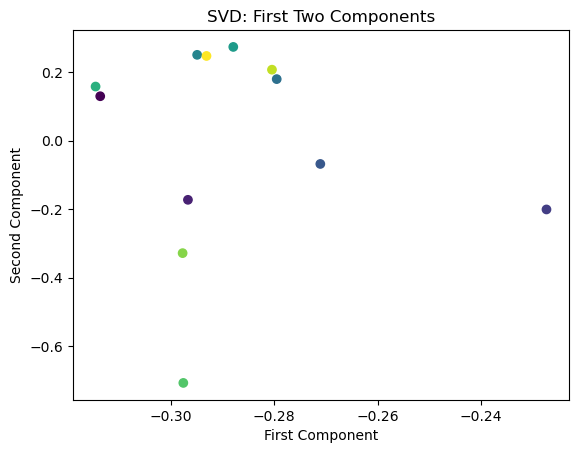

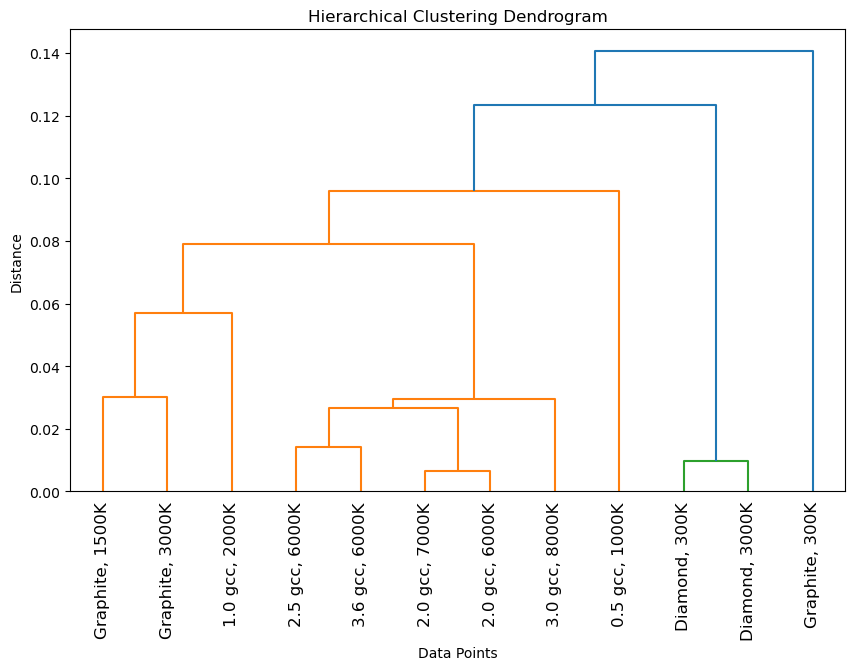

(12, 13, 60)
(156, 60)


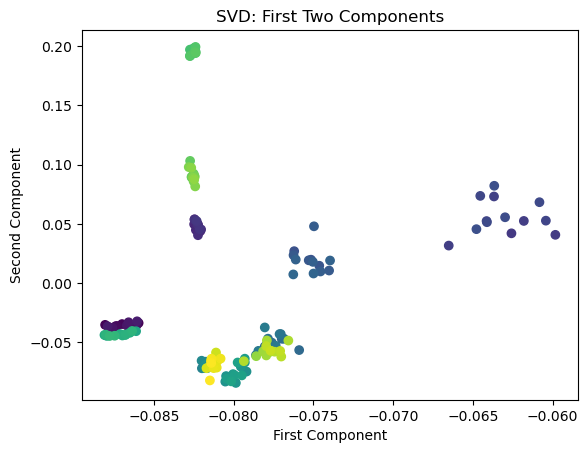

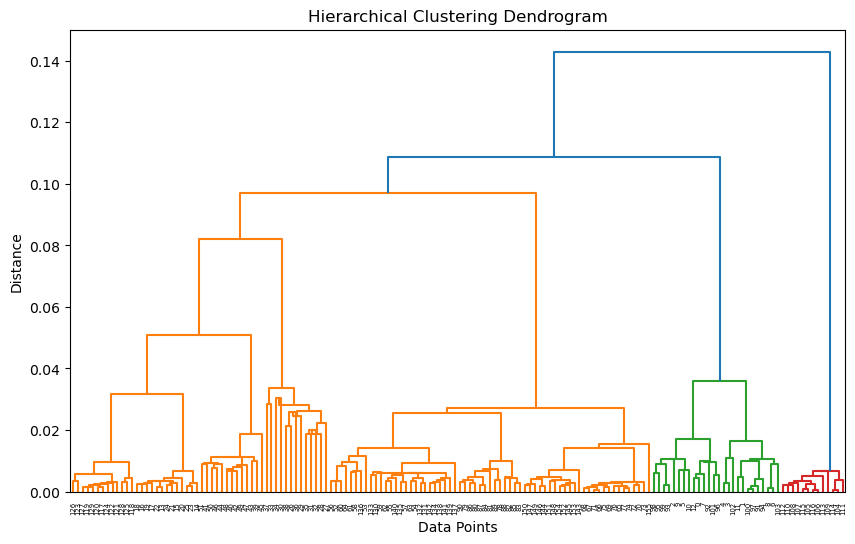

In [16]:
with open("4b_avg_pd_equilibrium", 'rb') as pickle_file:
    avg_pd = pickle.load(pickle_file)

# Confirmation of appropriate loading
print(np.shape(avg_pd))

# Reshape the array to (12, 60) before creating the DataFrame
reshaped_data = np.array(avg_pd).reshape(12, 60)

# Create a DataFrame
df = pd.DataFrame(reshaped_data)

# Print the DataFrame
print(df.head())

# SVD Decomposition
U, S, Vt = np.linalg.svd(df, full_matrices=False)

# Create a list of colors (replace this with your color preferences)
colors = np.arange(len(U[:, 0]))

# Plot the first two components from the U matrix
plt.scatter(U[:, 0], U[:, 1], c=colors, cmap='viridis')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('SVD: 4B P(d) Avgs.')
plt.show()

# Hierarchical clustering
linkage_matrix = linkage(df, method='median')  # You can choose a different linkage method

# Plot the dendrogram with labeled points
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=df.index, orientation='top', distance_sort='descending', leaf_label_func=lambda x: replace_labels(x, sp_labels))
plt.title('Dendrogram: 4B P(d) Avgs.')
plt.xticks(rotation='vertical')
plt.ylabel('Distance')
plt.show()

with open("4b_all_pd_equilibrium", 'rb') as pickle_file:
    all_pd = pickle.load(pickle_file)

print(np.shape(all_pd))

stacked_data = np.vstack(all_pd)
print(np.shape(stacked_data))

# Create a DataFrame
all_df = pd.DataFrame(stacked_data)

# SVD Decomposition
U, S, Vt = np.linalg.svd(all_df, full_matrices=False)

# Create a list of colors (replace this with your color preferences)
colors = np.arange(len(U[:, 0]))

# Plot the first two components from the U matrix
plt.scatter(U[:, 0], U[:, 1], c=colors, cmap='viridis')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('SVD: 2B P(d)')
plt.show()

# Hierarchical clustering
linkage_matrix = linkage(all_df, method='median')  # You can choose a different linkage method

# Plot the dendrogram with labeled points
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=all_df.index, orientation='top', distance_sort='descending')
plt.title('Dendrogram: 4B P(d) Avgs.')
plt.xticks(rotation='vertical')
plt.ylabel('Distance')
plt.show()